In [1]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
%matplotlib inline

In order to create some reasonalbe values, for each product we draw a demand curve for each customer and we evaluate the marginal reward given by them in each point. In order to make this analysis we assume that there is no indirect reward from other products.
As demand curve we use the cumulative distribution function $\phi(x)$ for a Gaussian distribution with mean $\mu$ and standar deviation $\sigma$.

$\sigma$ controls the smoothness of the demand curve around the price $\mu$. If $\sigma$ is high, the curve will be steeper.

## Skate clothes shop (like VANS)
generally skate clothings are unisex $\rightarrow$ we do not need to distinguish products for males and females.
We assume the number of items bought does not depend on the price.

| product | prices (indicative) | quantity( indicative)| $\alpha$ male| $\alpha$ female| $\alpha$ old|
| --- | --- | --- | --- | --- | --- |
| t-shirt| 40 | 3 | 0.2 | 0.4 |0.2|
| hoodie| 120 | 2 | 0.2 |0.5|0.2|
| shoes| 90 | 1 | 0.2 | 0.1 |0.1|
| hat| 30 | 3 | 0.2 | 0 | 0.1 |
| shirt| 80 | 2 | 0.2 | 0 | 0.4 |


## Business graph
| |t-shirt (0)| hoodie (1)| shoes(2)| hat(3)| shirt(4)| 
| --- | --- | --- | --- | --- | --- |
| t-shirt|  | 1 |  |  | 2 |
| hoodie| 1 |  |  | | 2 |
| shoes| 1 |  |  | 2 ||
| hat| 1 |  | 2 |  |  |
| shirt| 1 |  | 2 |  |  |

In [2]:
def cv_curve(mu, sigma, x, scale):
    y = norm.pdf(x, mu, sigma)
    y = y / (max(y) - min(y))
    return y * scale
    

In [3]:
import json
import os

graph = {
    "graph":[
    [1, 4],
    [0, 4],
    [0, 3],
    [0, 2],
    [0, 2]
    ]
}

file_path = os.path.abspath('') + "\\code\\data\\business_full_graph2.json"


#file_path = "{}/../data/business_full_graph2.json".format(os.path.dirname(os.path.abspath(__file__)))
with open(file_path, 'w') as outfile:
    json.dump(graph, outfile)

## Customer graph 
we assume customers behave similarly except for the hat and shirts. Only boys are interested in hats. Girls are not interested in shirts.

We assume if a customer starts from an upper body clothing will be interested in the upper part.


|BOY|t-shirt | hoodie | shoes| hat| shirt| 
| --- | --- | --- | --- | --- | --- |
| t-shirt| 0 | 0.3 | 0.1 | 0.2 |0.2|
| hoodie| 0.5 | 0 | 0.2 |0.2|0.1|
| shoes| 0.4 | 0.2 | 0 | 0.3 |0.1|
| hat| 0.6 | 0.3 | 0.1 | 0 | 0.1 |
| shirt| 0.5 | 0.1 | 0.1 | 0.1 | 0 |

In [4]:
boy_graph = [
        [0, 0.3, 0.1, 0.2, 0.2],
        [0.5, 0, 0.2, 0.2, 0.1],
        [0.4, 0.2, 0, 0.3, 0.1],
        [0.6, 0.3, 0.1, 0, 0.1],
        [0.5, 0.1, 0.1, 0.1, 0]
      ]

|GIRL|t-shirt | hoodie | shoes| hat| shirt| 
| --- | --- | --- | --- | --- | --- |
| t-shirt| 0 | 0.2 | 0.1 | 0 |0.05|
| hoodie| 0.5 | 0 | 0.1 |0|0.05|
| shoes| 0.4 | 0.25 | 0 | 0 |0.05|
| hat| 0.5 | 0.3 | 0.1 | 0 | 0.05 |
| shirt| 0.5 | 0.1 | 0.1 | 0 | 0 |

In [5]:
girl_graph = [
        [0, 0.2, 0.1, 0, 0.05],
        [0.5, 0, 0.1, 0, 0.05],
        [0.4, 0.25, 0, 0, 0.05],
        [0.5, 0.3, 0.1, 0, 0.05],
        [0.5, 0.1, 0.1, 0, 0]
      ]

|OLD|t-shirt | hoodie | shoes| hat| shirt| 
| --- | --- | --- | --- | --- | --- |
| t-shirt| 0 | 0.3 | 0.1 | 0|0.3|
| hoodie| 0.5 | 0 | 0.2 |0|0.3|
| shoes| 0.4 | 0.2 | 0 | 0 |0.3|
| hat| 0.6 | 0.3 | 0.1 | 0 | 0.3 |
| shirt| 0.4 | 0.1 | 0.1 | 0| 0 |

In [6]:
old_graph = [
        [0, 0.3, 0.1, 0, 0.3],
        [0.5, 0, 0.2, 0, 0.3],
        [0.4, 0.2, 0, 0, 0.3],
        [0.6, 0.3, 0.1, 0, 0.3],
        [0.4, 0.1, 0.1, 0, 0]
      ]

In [7]:
customer_distribution = [0.5, 0.3, 0.2]

In [8]:
MAXIMUM_PRICE = 150
cents = 100
classes = 3
alphas = [ # rows products, columns classes. In this case socks and hats alphas has been set to the probability of clicking on it when interacting with the web
    [0.2, 0.4, 0.2], 
    [0.2, 0.5, 0.2], 
    [0.2, 0.09998, 0.1],
    [0.2, 0.00001, 0.1],
    [0.2, 0.00001, 0.4]
]

n_items = [
    [1.5, 1.2, 1.2], 
    [1.2, 1.2, 1], 
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 2]
]

prices = np.linspace(0, MAXIMUM_PRICE, cents * MAXIMUM_PRICE) # we consider the range of prices that go from 0 to MAXIMUM PRICE


## T-shirt

young people are more likely to be biased by the price: if a product is expensive is more attractive. Old people have decreasing demand curve, young people increasing curve

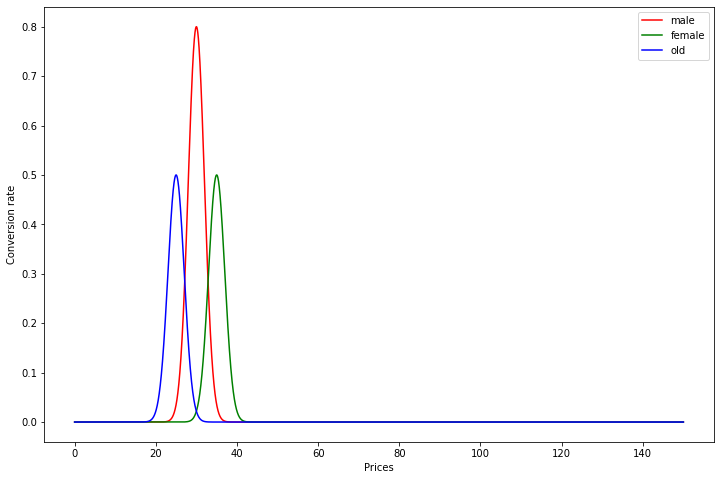

In [9]:

mu_1 = [30, 35, 25]
sigma_1 = [2, 2, 2]
scale_1 = [0.8, 0.5, 0.5]
cv_1 = []
cv_1.append(cv_curve(mu_1[0], sigma_1[0], prices, scale_1[0]))
cv_1.append(cv_curve(mu_1[1], sigma_1[1], prices, scale_1[1]))
cv_1.append(cv_curve(mu_1[2], sigma_1[2], prices, scale_1[2]))
cv_1


plt.figure(figsize=(12,8))
plt.plot(prices, cv_1[0], color="red", label="male")
plt.plot(prices, cv_1[1], color="green", label="female")
plt.plot(prices, cv_1[2], color="blue", label="old")
plt.xlabel("Prices")
plt.ylabel("Conversion rate")
plt.legend()
plt.show()


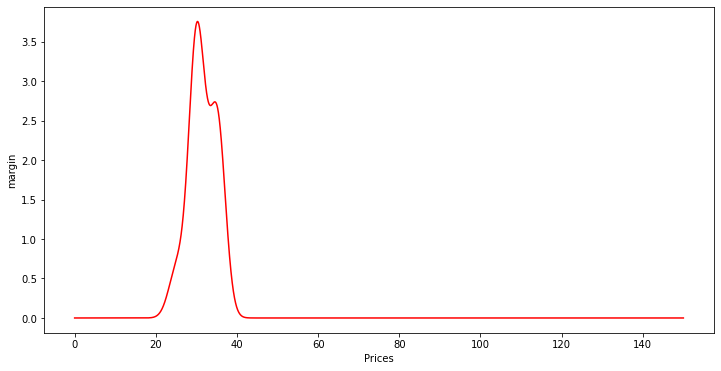

In [10]:
expected_margin_1 = 0
for i in range(classes):
    expected_margin_1 += cv_1[i] * customer_distribution[i] * alphas[0][i] * n_items[0][i]
expected_margin_1 = expected_margin_1 * prices

plt.figure(figsize=(12,6))
plt.plot(prices, expected_margin_1, color="red")
plt.xlabel("Prices")
plt.ylabel("margin")
plt.show()

From the plot above we can take prices 25, 30 , 35, 40 that present very different margins.

In [11]:
selected_prices_1 = np.array([20, 25, 30, 35]) * cents
product1_margins_1 = [expected_margin_1[int(p)] for p in selected_prices_1]
product1_margins_1

[0.021135294837646135,
 0.7321412768872693,
 3.7269454233793398,
 2.7041809998402444]

now we can find the conversion rates corresponding to the prices:


In [12]:
c1_p1 = [cv_1[0][p] for p in selected_prices_1] 
c2_p1 = [cv_1[1][p] for p in selected_prices_1]
c3_p1 = [cv_1[2][p] for p in selected_prices_1]
print(c1_p1, c2_p1, c3_p1)

[2.9912783565706134e-06, 0.03522286172820658, 0.8, 0.03504716360532362] [3.066263808955691e-13, 1.871107787584974e-06, 0.02202346433524691, 0.5] [0.022005116647955725, 0.5, 0.021913607238088315, 1.8524874837932936e-06]


# Hoodie
Old people are not baiased by the price on the quality, thus their conversion rate decreases.

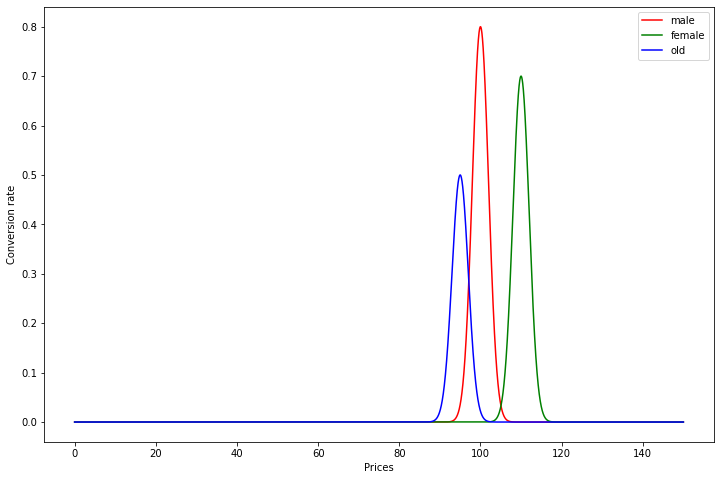

In [13]:
mu_2 = [100, 110 ,95]
sigma_2 = [2, 2, 2]
scale_2 = [0.8, 0.7, 0.5]
cv_2 = []
cv_2.append(cv_curve(mu_2[0], sigma_2[0], prices, scale_2[0]))
cv_2.append(cv_curve(mu_2[1], sigma_2[1], prices, scale_2[1]))
cv_2.append(cv_curve(mu_2[2], sigma_2[2], prices, scale_2[2]))
cv_2


plt.figure(figsize=(12,8))
plt.plot(prices, cv_2[0], color="red", label="male")
plt.plot(prices, cv_2[1], color="green", label="female")
plt.plot(prices, cv_2[2], color="blue", label="old")
plt.xlabel("Prices")
plt.ylabel("Conversion rate")
plt.legend()
plt.show()

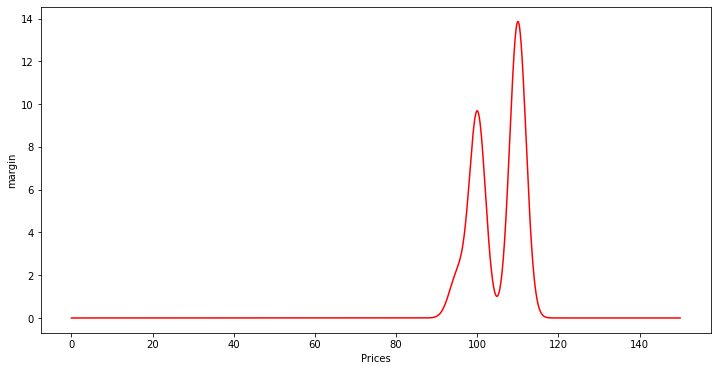

In [14]:
expected_margin_2 = 0
for i in range(classes):
    expected_margin_2 += cv_2[i] * customer_distribution[i] * alphas[1][i] * n_items[1][i]
expected_margin_2 = expected_margin_2 * prices

plt.figure(figsize=(12,6))
plt.plot(prices, expected_margin_2, color="red")
plt.xlabel("Prices")
plt.ylabel("margin")
plt.show()


In [15]:
selected_prices_2 = np.array([92, 98, 103, 110]) * cents
product1_margins_2 = [expected_margin_2[p] for p in selected_prices_2]
product1_margins_2

[0.6031526748577598,
 6.3585200325755755,
 3.2232871174356528,
 13.860881836542656]

In [16]:
c1_p2 = [cv_2[0][p] for p in selected_prices_2] 
c2_p2 = [cv_2[1][p] for p in selected_prices_2]
c3_p2 = [cv_2[2][p] for p in selected_prices_2]
print(c1_p2, c2_p2, c3_p2)

[0.00027168170459382547, 0.4868103708103235, 0.25838659114569096, 2.9271437463300646e-06] [1.8542026330477384e-18, 1.0871968206545667e-08, 0.0015497487130994502, 0.6999959161340806] [0.16307421159258698, 0.16153213743090486, 0.00016544270053872847, 2.968189445362496e-13]


## shoes
People are convinced expensive shoes are more durable, all customers have incremental demand curves.

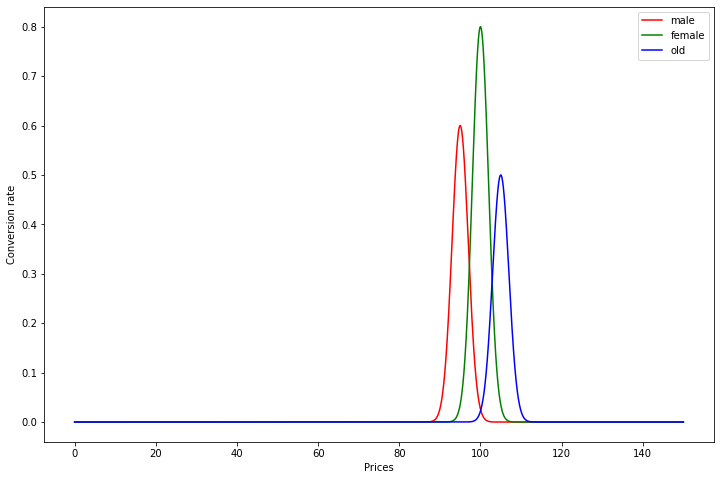

In [17]:
mu_3 = [95, 100 ,105]
sigma_3 = [2, 2, 2]
scale_3 = [0.6, 0.8, 0.5]
cv_3 = []
cv_3.append(cv_curve(mu_3[0], sigma_3[0], prices, scale_3[0]))
cv_3.append(cv_curve(mu_3[1], sigma_3[1], prices, scale_3[1]))
cv_3.append(cv_curve(mu_3[2], sigma_3[2], prices, scale_3[2]))
cv_3


plt.figure(figsize=(12,8))
plt.plot(prices, cv_3[0], color="red", label="male")
plt.plot(prices, cv_3[1], color="green", label="female")
plt.plot(prices, cv_3[2], color="blue", label="old")
plt.xlabel("Prices")
plt.ylabel("Conversion rate")
plt.legend()
plt.show()

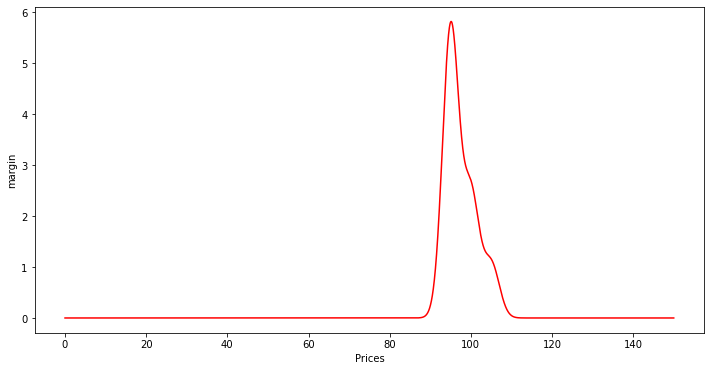

In [18]:
expected_margin_3 = 0
for i in range(classes):
    expected_margin_3 += cv_3[i] * customer_distribution[i] * alphas[2][i] * n_items[2][i]
expected_margin_3 = expected_margin_3 * prices

plt.figure(figsize=(12,6))
plt.plot(prices, expected_margin_3, color="red")
plt.xlabel("Prices")
plt.ylabel("margin")
plt.show()

In [19]:
selected_prices_3 = np.array([90, 95, 100, 105]) * cents
product1_margins_3 = [expected_margin_3[p] for p in selected_prices_3]
product1_margins_3

[0.2390691299949783, 5.801323259809867, 2.705427520163246, 1.1598290962025202]

In [20]:
c1_p3 = [cv_3[0][p] for p in selected_prices_3] 
c2_p3 = [cv_3[1][p] for p in selected_prices_3]
c3_p3 = [cv_3[2][p] for p in selected_prices_3]
print(c1_p3, c2_p3, c3_p3)

[0.026560558053263947, 0.5999979997366408, 0.026143272477398144, 2.197190112469368e-06] [3.0263730677446133e-06, 0.03542880878501158, 0.799996666229124, 0.03484314464592403] [3.1203873757626417e-13, 1.8930586928617275e-06, 0.022152216433476236, 0.499997499672885]


# Hats
all customers have decreasing demand.

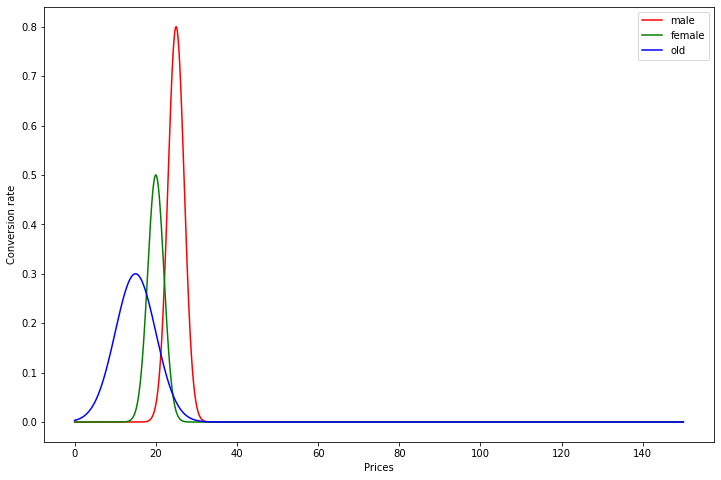

In [21]:
mu_4 = [25, 20 ,15]
sigma_4 = [2, 2, 5]
scale_4 = [0.8, 0.5, 0.3]
cv_4 = []
cv_4.append(cv_curve(mu_4[0], sigma_4[0], prices, scale_4[0]))
cv_4.append(cv_curve(mu_4[1], sigma_4[1], prices, scale_4[1]))
cv_4.append(cv_curve(mu_4[2], sigma_4[2], prices, scale_4[2]))
cv_4

plt.figure(figsize=(12,8))
plt.plot(prices, cv_4[0], color="red", label="male")
plt.plot(prices, cv_4[1], color="green", label="female")
plt.plot(prices, cv_4[2], color="blue", label="old")
plt.xlabel("Prices")
plt.ylabel("Conversion rate")
plt.legend()
plt.show()

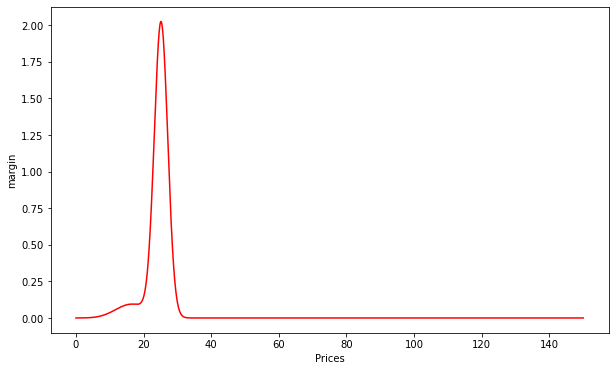

In [22]:
expected_margin_4 = 0
for i in range(classes):
    expected_margin_4 += cv_4[i] * customer_distribution[i] * alphas[3][i] * n_items[3][i]
expected_margin_4 = expected_margin_4 * prices


plt.figure(figsize=(10,6))

plt.plot(prices, expected_margin_4, color="red")
plt.xlabel("Prices")
plt.ylabel("margin")
plt.show()

In [23]:
selected_prices_4 = np.array([20, 25, 30, 35]) * cents
product1_margins_4 = [expected_margin_4[p] for p in selected_prices_4]
product1_margins_4

[0.1432201916325603,
 2.0204231009232174,
 0.10718968188162291,
 8.069506774599433e-05]

In [24]:
c1_p4 = [cv_4[0][p] for p in selected_prices_4] 
c2_p4 = [cv_4[1][p] for p in selected_prices_4]
c3_p4 = [cv_4[2][p] for p in selected_prices_4]
print(c1_p4, c2_p4, c3_p4)


[0.035208186636729165, 0.8, 0.03506177158094131, 2.96397997406927e-06] [0.5, 0.02192274102830972, 1.8540320727908192e-06, 3.0243856701061437e-13] [0.18191067586581616, 0.04057352368848947, 0.00332870165524, 0.00010045108309362438]


## Shirt
girls have a decreasing demand curve.

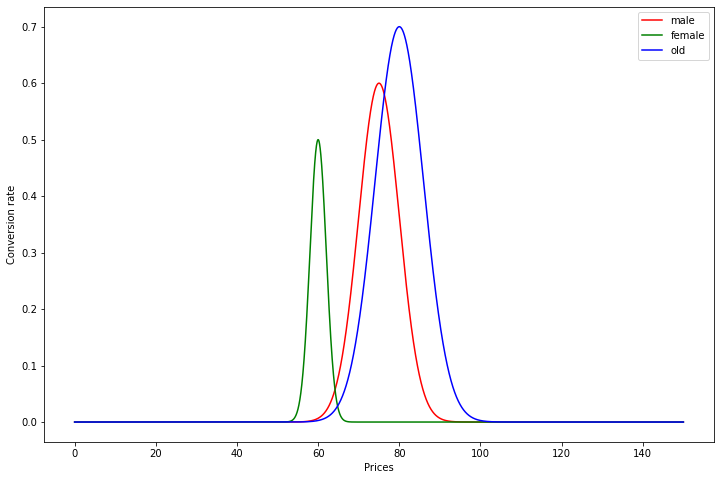

In [25]:
mu_5 = [75, 60 ,80]
sigma_5 = [5, 2, 6]
scale_5 = [0.6, 0.5, 0.7]
cv_5 = []
cv_5.append(cv_curve(mu_5[0], sigma_5[0], prices, scale_5[0]))
cv_5.append(cv_curve(mu_5[1], sigma_5[1], prices, scale_5[1]))
cv_5.append(cv_curve(mu_5[2], sigma_5[2], prices, scale_5[2]))
cv_5



plt.figure(figsize=(12,8))
plt.plot(prices, cv_5[0], color="red", label="male")
plt.plot(prices, cv_5[1], color="green", label="female")
plt.plot(prices, cv_5[2], color="blue", label="old")
plt.xlabel("Prices")
plt.ylabel("Conversion rate")
plt.legend()
plt.show()

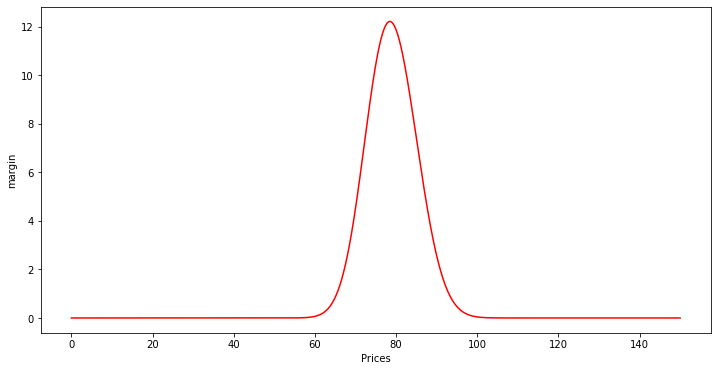

In [26]:
expected_margin_5 = 0
for i in range(classes):
    expected_margin_5 += cv_5[i] * customer_distribution[i] * alphas[4][i] * n_items[4][i]
expected_margin_5 = expected_margin_5 * prices


plt.figure(figsize=(12,6))

plt.plot(prices, expected_margin_5, color="red")
plt.xlabel("Prices")
plt.ylabel("margin")
plt.show()

In [27]:
selected_prices_5 = np.array([60, 70, 80, 90]) * cents
product1_margins_5 = [expected_margin_5[p] for p in selected_prices_5]
product1_margins_5

[0.06621969736773237,
 4.5075655951091305,
 11.86903341724696,
 2.5692281268554793]

In [28]:
c1_p5 = [cv_5[0][p] for p in selected_prices_5] 
c2_p5 = [cv_5[1][p] for p in selected_prices_5]
c3_p5 = [cv_5[2][p] for p in selected_prices_5]
print(c1_p5, c2_p5, c3_p5)

[0.006681416361585578, 0.3642582576970407, 0.3635303722615871, 0.006641442575052423] [0.5, 1.84171133103899e-06, 9.389949902202083e-23, 6.626667038082558e-50] [0.002712165057471637, 0.17477297200625705, 0.6999999351765454, 0.17425582373645027]


## Get conversion rates tables

In [29]:
approximation = 2
c1 = np.around([c1_p1, c1_p2, c1_p3, c1_p4, c1_p5], approximation)
c1 = c1.tolist()
c1

[[0.0, 0.04, 0.8, 0.04],
 [0.0, 0.49, 0.26, 0.0],
 [0.03, 0.6, 0.03, 0.0],
 [0.04, 0.8, 0.04, 0.0],
 [0.01, 0.36, 0.36, 0.01]]

In [30]:
c2 = np.around([c2_p1, c2_p2, c2_p3, c2_p4, c2_p5], approximation)
c2 = c2.tolist()

In [31]:
c3 = np.around([c3_p1, c3_p2, c3_p3, c3_p4, c3_p5], approximation)
c3 = c3.tolist()

## Build jsons
there is no way to automatize click graph generation...

In [32]:

classes = []
classes.append(
    {
        "features": [0, 0],
        "alpha": [a[0] for a in alphas],
        "buy_distribution": c1,
        "num_prods_distribution": [([1 / n[0]] * 4) for n in n_items],
        "click_graph": boy_graph
    }
)
classes.append(
    {
        "features": [0, 1],
        "alpha": [a[1] for a in alphas],
        "buy_distribution": c2,
        "num_prods_distribution": [([1 / n[1]] * 4) for n in n_items],
        "click_graph": girl_graph
    }
)
classes.append(
    {
        "features": [1, 0],
        "alpha": [a[2] for a in alphas],
        "buy_distribution": c3,
        "num_prods_distribution": [([1 / n[2]] * 4) for n in n_items],
        "click_graph": old_graph
    }
)
classes.append(
    {
        "features": [1, 1],
        "alpha": [a[2] for a in alphas],
        "buy_distribution": c3,
        "num_prods_distribution": [([1 / n[2]] * 4) for n in n_items],
        "click_graph": old_graph
    }
)


# writing customers in file
file_path = os.path.abspath('') + "\\code\\data\\customer3.json"

with open(file_path, 'w') as outfile:
    json.dump({"classes": classes}, outfile)



# Non Stationary Customers

In [33]:
customer_distribution = [0.5, 0.3, 0.2]

MAXIMUM_PRICE = 150
cents = 100
classes = 3
alphas = [ # rows products, columns classes. In this case socks and hats alphas has been set to the probability of clicking on it when interacting with the web
    [0.2, 0.4, 0.2], 
    [0.2, 0.5, 0.2], 
    [0.2, 0.09998, 0.1],
    [0.2, 0.00001, 0.1],
    [0.2, 0.00001, 0.4]
]

n_items = [
    [1.5, 1.2, 1.2], 
    [1.2, 1.2, 1], 
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 2]
]

prices = np.linspace(0, MAXIMUM_PRICE, cents * MAXIMUM_PRICE) # we consider the range of prices that go from 0 to MAXIMUM PRICE


# T-shirt

## step 2

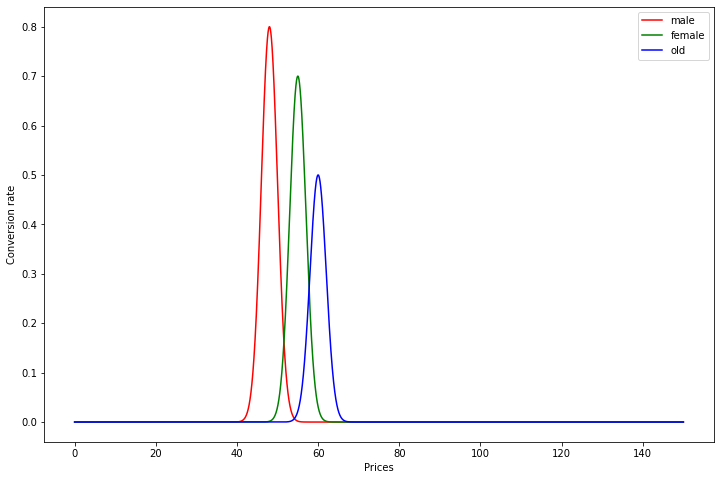

In [34]:
mu_12 = [48, 55, 60]
sigma_12 = [2, 2, 2]
scale_12 = [0.8, 0.7, 0.5]
cv_12 = []
cv_12.append(cv_curve(mu_12[0], sigma_12[0], prices, scale_12[0]))
cv_12.append(cv_curve(mu_12[1], sigma_12[1], prices, scale_12[1]))
cv_12.append(cv_curve(mu_12[2], sigma_12[2], prices, scale_12[2]))
cv_12


plt.figure(figsize=(12,8))
plt.plot(prices, cv_12[0], color="red", label="male")
plt.plot(prices, cv_12[1], color="green", label="female")
plt.plot(prices, cv_12[2], color="blue", label="old")
plt.xlabel("Prices")
plt.ylabel("Conversion rate")
plt.legend()
plt.show()


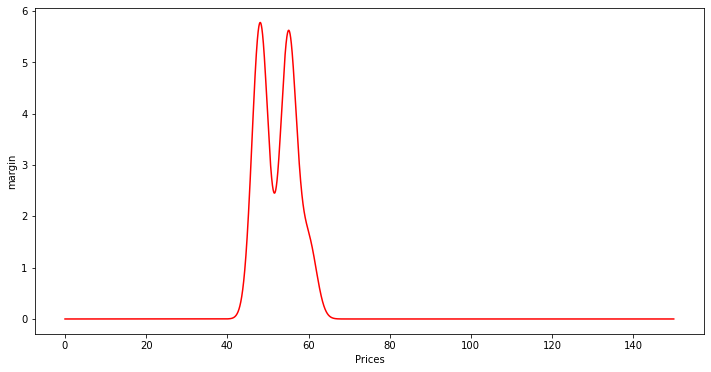

In [35]:
expected_margin_12 = 0
for i in range(classes):
    expected_margin_12 += cv_12[i] * customer_distribution[i] * alphas[0][i] * n_items[0][i]
expected_margin_12 = expected_margin_12 * prices

plt.figure(figsize=(12,6))
plt.plot(prices, expected_margin_12, color="red")
plt.xlabel("Prices")
plt.ylabel("margin")
plt.show()

From the plot above we can take prices 45, 51, 55, 63 that present very different margins.

In [36]:
selected_prices_12 = np.array([45, 51, 55, 63]) * cents
product1_margins_12 = [expected_margin_12[int(p)] for p in selected_prices_12]
product1_margins_12

[1.7572070066065584,
 2.6801419170716807,
 5.616982768699971,
 0.49147577045906965]

In [37]:
c12_p1 = [cv_12[0][p] for p in selected_prices_12] 
c22_p1 = [cv_12[1][p] for p in selected_prices_12]
c32_p1 = [cv_12[2][p] for p in selected_prices_12]
print(c12_p1, c22_p1, c32_p1)

[0.26030708564414673, 0.25906043976313825, 0.0017387982828549976, 4.805257747078056e-13] [2.6282984764543526e-06, 0.09505738836944048, 0.7, 0.00023285932816842475] [3.0854905421866665e-13, 2.0186507637767647e-05, 0.02206940051079716, 0.16181564337897514]


## step 3

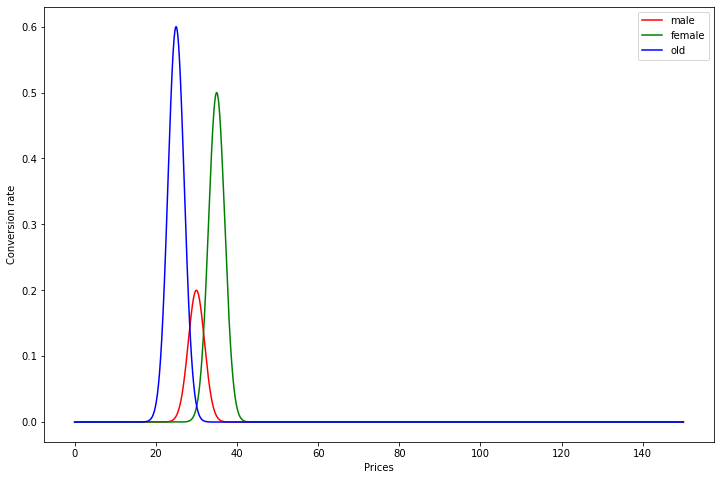

In [38]:

mu_13 = [65, 67, 72]
sigma_13 = [2, 2, 2]
scale_13 = [0.2, 0.5, 0.6]
cv_13 = []
cv_13.append(cv_curve(mu_1[0], sigma_1[0], prices, scale_13[0]))
cv_13.append(cv_curve(mu_1[1], sigma_1[1], prices, scale_13[1]))
cv_13.append(cv_curve(mu_1[2], sigma_1[2], prices, scale_13[2]))
cv_13


plt.figure(figsize=(12,8))
plt.plot(prices, cv_13[0], color="red", label="male")
plt.plot(prices, cv_13[1], color="green", label="female")
plt.plot(prices, cv_13[2], color="blue", label="old")
plt.xlabel("Prices")
plt.ylabel("Conversion rate")
plt.legend()
plt.show()


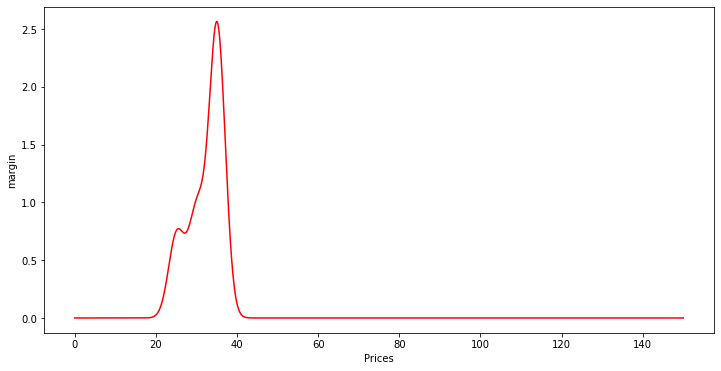

In [39]:
expected_margin_13 = 0
for i in range(classes):
    expected_margin_13 += cv_13[i] * customer_distribution[i] * alphas[0][i] * n_items[0][i]
expected_margin_13 = expected_margin_13 * prices

plt.figure(figsize=(12,6))
plt.plot(prices, expected_margin_13, color="red")
plt.xlabel("Prices")
plt.ylabel("margin")
plt.show()

In [40]:
selected_prices_13 = np.array([42, 50, 56, 63]) * cents
product1_margins_13 = [expected_margin_13[int(p)] for p in selected_prices_13]
product1_margins_13

[0.006583092836419421,
 2.169550685183936e-12,
 4.534745953631952e-24,
 1.2108016444134864e-42]

In [41]:
c13_p1 = [cv_13[0][p] for p in selected_prices_13] 
c23_p1 = [cv_13[1][p] for p in selected_prices_13]
c33_p1 = [cv_13[2][p] for p in selected_prices_13]
print(c13_p1, c23_p1, c33_p1)

[3.020513603801776e-09, 3.793733245865802e-23, 3.913867808548067e-38, 1.4711047539457022e-60] [0.0010883986333213808, 3.013063955815361e-13, 5.623069986650192e-25, 1.3345689200880278e-43] [1.21365253647113e-16, 6.915856833947963e-35, 3.944205924144536e-53, 2.3478316605277306e-79]


# Hoodie

## step 2

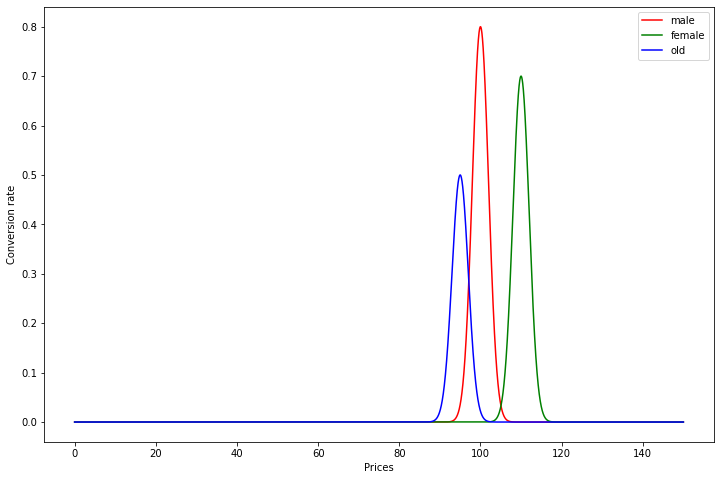

In [42]:
mu_22 = [75, 84 ,80]
sigma_22 = [2, 2, 2]
scale_22 = [0.5, 0.7, 0.8]
cv_22 = []
cv_22.append(cv_curve(mu_2[0], sigma_2[0], prices, scale_2[0]))
cv_22.append(cv_curve(mu_2[1], sigma_2[1], prices, scale_2[1]))
cv_22.append(cv_curve(mu_2[2], sigma_2[2], prices, scale_2[2]))
cv_22


plt.figure(figsize=(12,8))
plt.plot(prices, cv_22[0], color="red", label="male")
plt.plot(prices, cv_22[1], color="green", label="female")
plt.plot(prices, cv_22[2], color="blue", label="old")
plt.xlabel("Prices")
plt.ylabel("Conversion rate")
plt.legend()
plt.show()

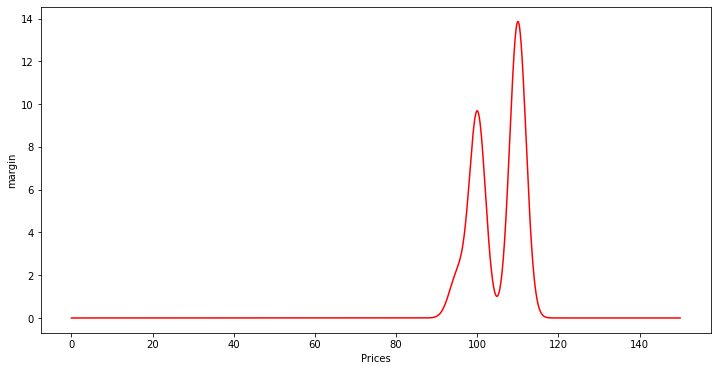

In [43]:
expected_margin_22 = 0
for i in range(classes):
    expected_margin_22 += cv_22[i] * customer_distribution[i] * alphas[1][i] * n_items[1][i]
expected_margin_22 = expected_margin_22 * prices

plt.figure(figsize=(12,6))
plt.plot(prices, expected_margin_22, color="red")
plt.xlabel("Prices")
plt.ylabel("margin")
plt.show()


In [44]:
selected_prices_22 = np.array([70, 77, 82, 88]) * cents
product1_margins_22 = [expected_margin_22[p] for p in selected_prices_22]
product1_margins_22

[1.6965548512778227e-34,
 4.061208891408108e-18,
 1.1171653752787145e-09,
 0.0038900972236266926]

In [45]:
c12_p2 = [cv_22[0][p] for p in selected_prices_22] 
c22_p2 = [cv_22[1][p] for p in selected_prices_22]
c32_p2 = [cv_22[2][p] for p in selected_prices_22]
print(c12_p2, c22_p2, c32_p2)

[1.1485806990001978e-49, 1.5782882518286967e-29, 2.1127436602085813e-18, 1.2400298505208782e-08] [1.0150075906621552e-87, 5.561017270821119e-60, 1.999206647687381e-43, 3.839675934699963e-27] [6.058720527218074e-35, 1.3184864103905345e-18, 3.405764868285462e-10, 0.0011050303797328319]


## step 3

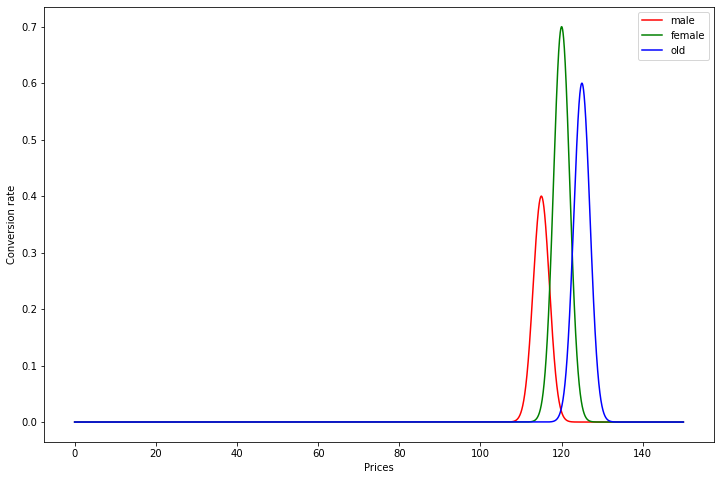

In [46]:
mu_23 = [115, 120 ,125]
sigma_23 = [2, 2, 2]
scale_23 = [0.4, 0.7, 0.6]
cv_23 = []
cv_23.append(cv_curve(mu_23[0], sigma_23[0], prices, scale_23[0]))
cv_23.append(cv_curve(mu_23[1], sigma_23[1], prices, scale_23[1]))
cv_23.append(cv_curve(mu_23[2], sigma_23[2], prices, scale_23[2]))
cv_23


plt.figure(figsize=(12,8))
plt.plot(prices, cv_23[0], color="red", label="male")
plt.plot(prices, cv_23[1], color="green", label="female")
plt.plot(prices, cv_23[2], color="blue", label="old")
plt.xlabel("Prices")
plt.ylabel("Conversion rate")
plt.legend()
plt.show()

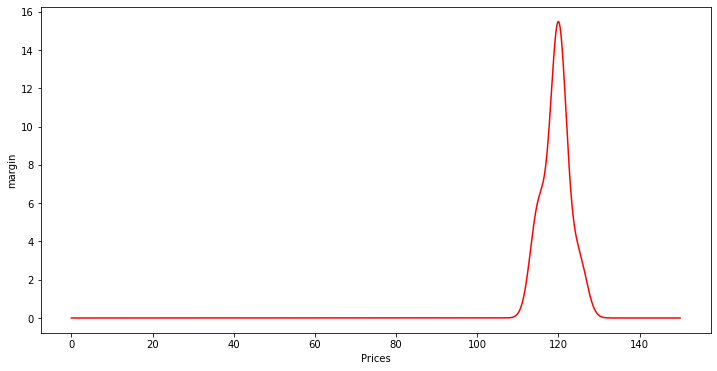

In [47]:
expected_margin_23 = 0
for i in range(classes):
    expected_margin_23 += cv_23[i] * customer_distribution[i] * alphas[1][i] * n_items[1][i]
expected_margin_23 = expected_margin_23 * prices

plt.figure(figsize=(12,6))
plt.plot(prices, expected_margin_23, color="red")
plt.xlabel("Prices")
plt.ylabel("margin")
plt.show()


In [48]:
selected_prices_23 = np.array([112, 115, 121, 125]) * cents
product1_margins_23 = [expected_margin_23[p] for p in selected_prices_23]
product1_margins_23

[1.7600451428941513, 6.163157254933194, 13.888201784311539, 3.6850722034237298]

In [49]:
c13_p2 = [cv_23[0][p] for p in selected_prices_23] 
c23_p2 = [cv_23[1][p] for p in selected_prices_23]
c33_p2 = [cv_23[2][p] for p in selected_prices_23]
print(c1_p2, c2_p2, c3_p2)

[0.00027168170459382547, 0.4868103708103235, 0.25838659114569096, 2.9271437463300646e-06] [1.8542026330477384e-18, 1.0871968206545667e-08, 0.0015497487130994502, 0.6999959161340806] [0.16307421159258698, 0.16153213743090486, 0.00016544270053872847, 2.968189445362496e-13]


# Shoes

## step 2

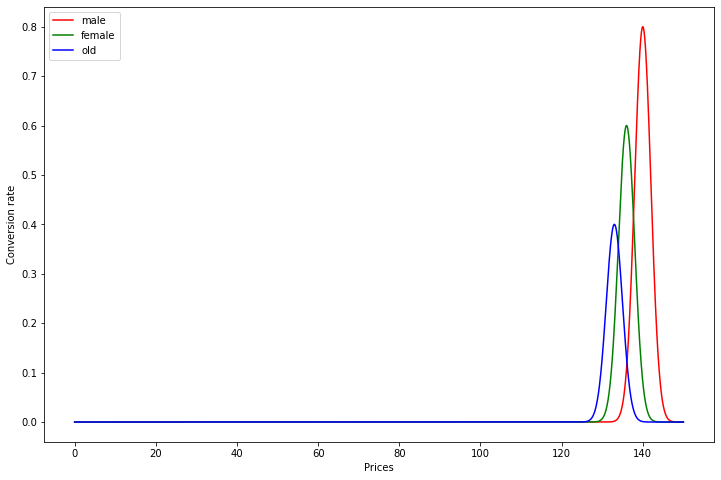

In [50]:
mu_32 = [140, 136 ,133]
sigma_32 = [2, 2, 2]
scale_32 = [0.8, 0.6, 0.4]
cv_32 = []
cv_32.append(cv_curve(mu_32[0], sigma_32[0], prices, scale_32[0]))
cv_32.append(cv_curve(mu_32[1], sigma_32[1], prices, scale_32[1]))
cv_32.append(cv_curve(mu_32[2], sigma_32[2], prices, scale_32[2]))
cv_32


plt.figure(figsize=(12,8))
plt.plot(prices, cv_32[0], color="red", label="male")
plt.plot(prices, cv_32[1], color="green", label="female")
plt.plot(prices, cv_32[2], color="blue", label="old")
plt.xlabel("Prices")
plt.ylabel("Conversion rate")
plt.legend()
plt.show()

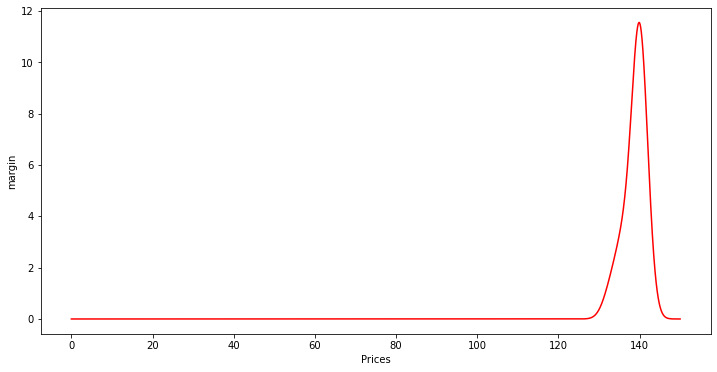

In [51]:
expected_margin_32 = 0
for i in range(classes):
    expected_margin_32 += cv_32[i] * customer_distribution[i] * alphas[2][i] * n_items[2][i]
expected_margin_32 = expected_margin_32 * prices

plt.figure(figsize=(12,6))
plt.plot(prices, expected_margin_32, color="red")
plt.xlabel("Prices")
plt.ylabel("margin")
plt.show()

In [52]:
selected_prices_32 = np.array([130, 135, 140, 147]) * cents
product1_margins_32 = [expected_margin_32[p] for p in selected_prices_32]
product1_margins_32

[0.3662311018386192,
 3.2810538212689595,
 11.54086352074748,
 0.02528952522931612]

In [53]:
c12_p3 = [cv_32[0][p] for p in selected_prices_32] 
c22_p3 = [cv_32[1][p] for p in selected_prices_32]
c32_p3 = [cv_32[2][p] for p in selected_prices_32]
print(c12_p3, c22_p3, c32_p3)

[3.04659868557236e-06, 0.035546880648589886, 0.7999913322246189, 0.0017202138822167022] [0.0067525569509499575, 0.5306856171346175, 0.08044590075403313, 1.576656290456838e-07] [0.1307066828979363, 0.24152048205416904, 0.0008608107468312974, 8.849989310902073e-12]


## step 3

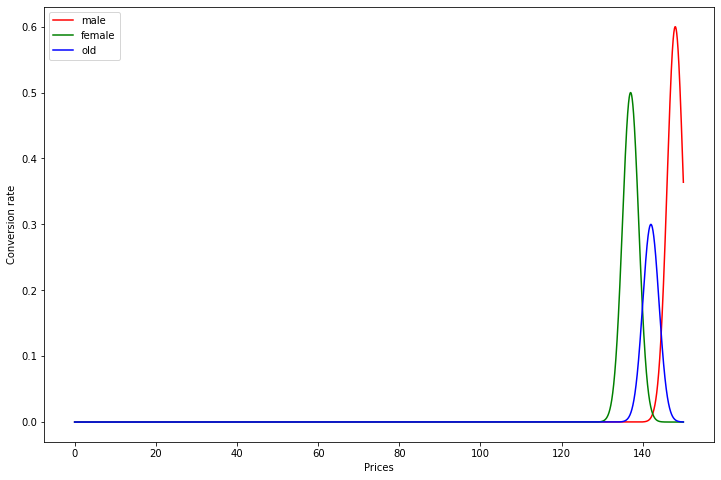

In [54]:
mu_33 = [148, 137 ,142]
sigma_33 = [2, 2, 2]
scale_33 = [0.6, 0.5, 0.3]
cv_33 = []
cv_33.append(cv_curve(mu_33[0], sigma_33[0], prices, scale_33[0]))
cv_33.append(cv_curve(mu_33[1], sigma_33[1], prices, scale_33[1]))
cv_33.append(cv_curve(mu_33[2], sigma_33[2], prices, scale_33[2]))
cv_33


plt.figure(figsize=(12,8))
plt.plot(prices, cv_33[0], color="red", label="male")
plt.plot(prices, cv_33[1], color="green", label="female")
plt.plot(prices, cv_33[2], color="blue", label="old")
plt.xlabel("Prices")
plt.ylabel("Conversion rate")
plt.legend()
plt.show()

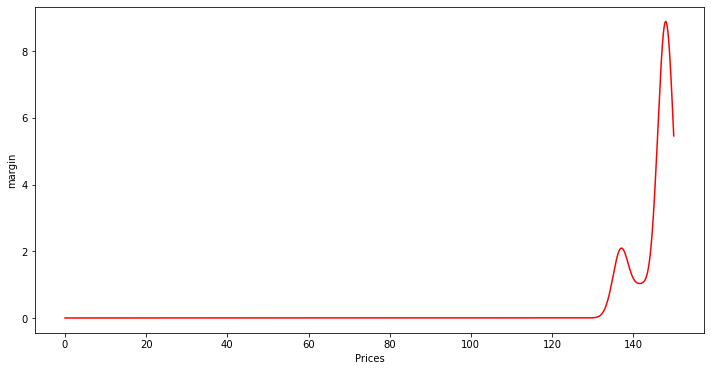

In [55]:
expected_margin_33 = 0
for i in range(classes):
    expected_margin_33 += cv_33[i] * customer_distribution[i] * alphas[2][i] * n_items[2][i]
expected_margin_33 = expected_margin_33 * prices

plt.figure(figsize=(12,6))
plt.plot(prices, expected_margin_33, color="red")
plt.xlabel("Prices")
plt.ylabel("margin")
plt.show()

In [56]:
selected_prices_33 = np.array([130, 135, 142, 149]) * cents
product1_margins_33 = [expected_margin_33[p] for p in selected_prices_33]
product1_margins_33

[0.004330194663216412,
 1.2353876372649777,
 1.0405262854302726,
 7.872302680419389]

In [57]:
c13_p3 = [cv_33[0][p] for p in selected_prices_33] 
c23_p3 = [cv_33[1][p] for p in selected_prices_33]
c33_p3 = [cv_33[2][p] for p in selected_prices_33]
print(c13_p3, c23_p3, c33_p3)

[1.6075306798355506e-18, 4.134089588542698e-10, 0.006760652441770634, 0.5281782508314593] [0.0011104512675270048, 0.30463013420766644, 0.021709780348940017, 7.3913058765997434e-09] [4.689309818941913e-09, 0.0006666590280734421, 0.2999966495719978, 0.0006449294696040316]


# Hats

## step 2

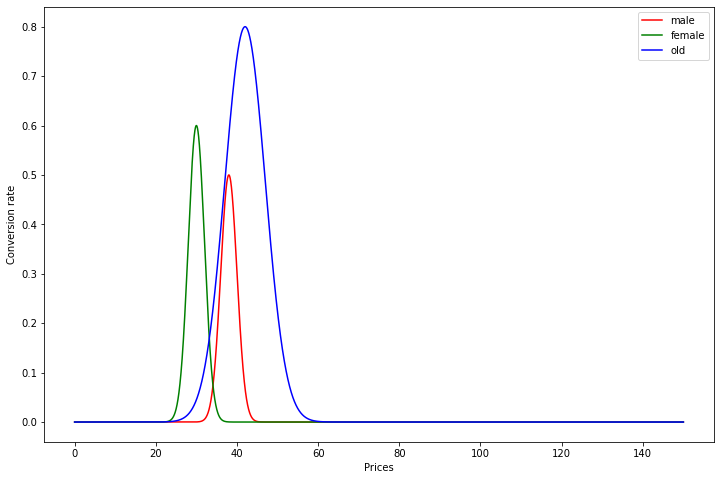

In [58]:
mu_42 = [38, 30 ,42]
sigma_42 = [2, 2, 5]
scale_42 = [0.5, 0.6, 0.8]
cv_42 = []
cv_42.append(cv_curve(mu_42[0], sigma_42[0], prices, scale_42[0]))
cv_42.append(cv_curve(mu_42[1], sigma_42[1], prices, scale_42[1]))
cv_42.append(cv_curve(mu_42[2], sigma_42[2], prices, scale_42[2]))
cv_42

plt.figure(figsize=(12,8))
plt.plot(prices, cv_42[0], color="red", label="male")
plt.plot(prices, cv_42[1], color="green", label="female")
plt.plot(prices, cv_42[2], color="blue", label="old")
plt.xlabel("Prices")
plt.ylabel("Conversion rate")
plt.legend()
plt.show()

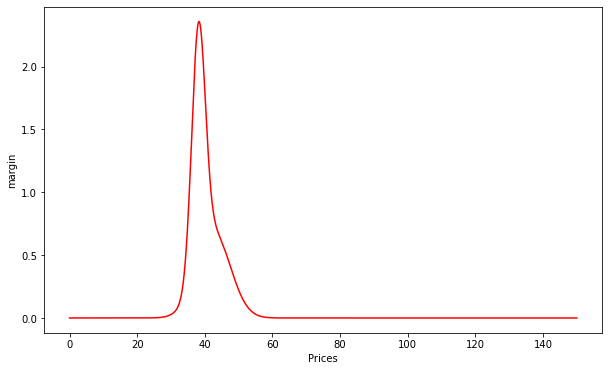

In [59]:
expected_margin_42 = 0
for i in range(classes):
    expected_margin_42 += cv_42[i] * customer_distribution[i] * alphas[3][i] * n_items[3][i]
expected_margin_42 = expected_margin_42 * prices


plt.figure(figsize=(10,6))

plt.plot(prices, expected_margin_42, color="red")
plt.xlabel("Prices")
plt.ylabel("margin")
plt.show()

In [60]:
selected_prices_42 = np.array([30, 36, 45, 48]) * cents
product1_margins_42 = [expected_margin_42[p] for p in selected_prices_4]
product1_margins_42

[2.0031843785396302e-05,
 0.001238952117179574,
 0.027531615754064778,
 0.7795033923297504]

In [61]:
c12_p4 = [cv_42[0][p] for p in selected_prices_42] 
c22_p4 = [cv_42[1][p] for p in selected_prices_42]
c32_p4 = [cv_42[2][p] for p in selected_prices_42]
print(c12_p4, c22_p4, c32_p4)


[0.00016840367866123183, 0.30362951595094745, 0.001088017709677119, 1.8484775719147628e-06] [0.6, 0.006641442575052423, 3.6201997722639084e-13, 1.5239479603947309e-18] [0.04495094879505135, 0.3896261959902679, 0.6679756230717582, 0.3891028203889671]


## step 3

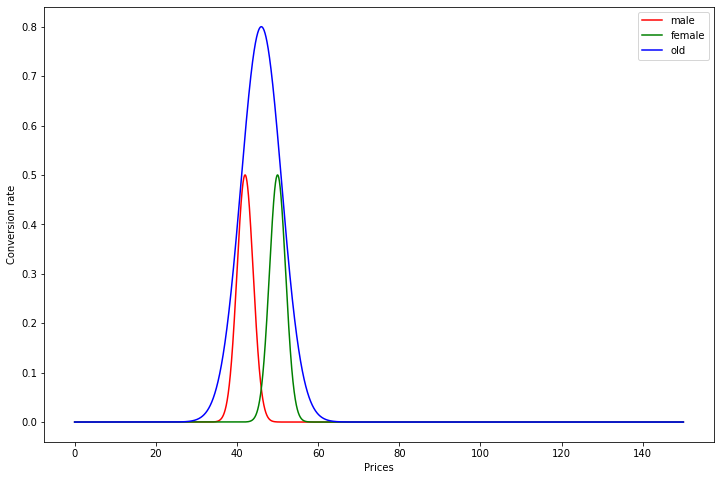

In [62]:
mu_43 = [42, 50 ,46]
sigma_43 = [2, 2, 5]
scale_43 = [0.5, 0.5, 0.8]
cv_43 = []
cv_43.append(cv_curve(mu_43[0], sigma_43[0], prices, scale_43[0]))
cv_43.append(cv_curve(mu_43[1], sigma_43[1], prices, scale_43[1]))
cv_43.append(cv_curve(mu_43[2], sigma_43[2], prices, scale_43[2]))
cv_43

plt.figure(figsize=(12,8))
plt.plot(prices, cv_43[0], color="red", label="male")
plt.plot(prices, cv_43[1], color="green", label="female")
plt.plot(prices, cv_43[2], color="blue", label="old")
plt.xlabel("Prices")
plt.ylabel("Conversion rate")
plt.legend()
plt.show()

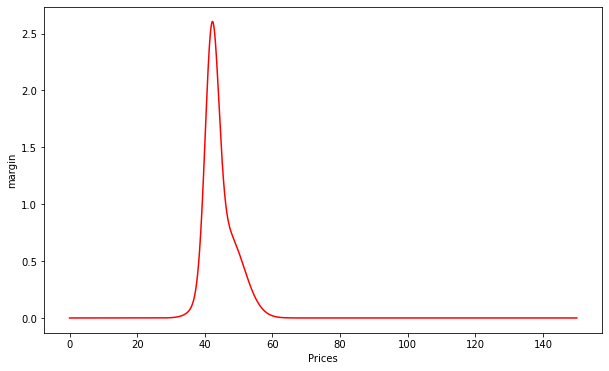

In [63]:
expected_margin_43 = 0
for i in range(classes):
    expected_margin_43 += cv_43[i] * customer_distribution[i] * alphas[3][i] * n_items[3][i]
expected_margin_43 = expected_margin_43 * prices


plt.figure(figsize=(10,6))

plt.plot(prices, expected_margin_43, color="red")
plt.xlabel("Prices")
plt.ylabel("margin")
plt.show()

In [64]:
selected_prices_43 = np.array([38, 43, 46, 52]) * cents
product1_margins_43 = [expected_margin_43[p] for p in selected_prices_43]
product1_margins_43

[0.4270016279494574,
 2.4710373958994336,
 1.0463970512341185,
 0.4047248466780339]

In [65]:
c13_p4 = [cv_43[0][p] for p in selected_prices_43] 
c23_p4 = [cv_43[1][p] for p in selected_prices_43]
c33_p4 = [cv_43[2][p] for p in selected_prices_43]
print(c13_p4, c23_p4, c33_p4)


[0.06783930715182103, 0.44093229463077654, 0.06746041839377065, 1.8472454999989964e-06] [7.67309266458973e-09, 0.0010992470674156432, 0.06787550259279243, 0.3027400559592951] [0.222610255258508, 0.6684461062300342, 0.8, 0.38907791528486446]


# Shirt

## step 2

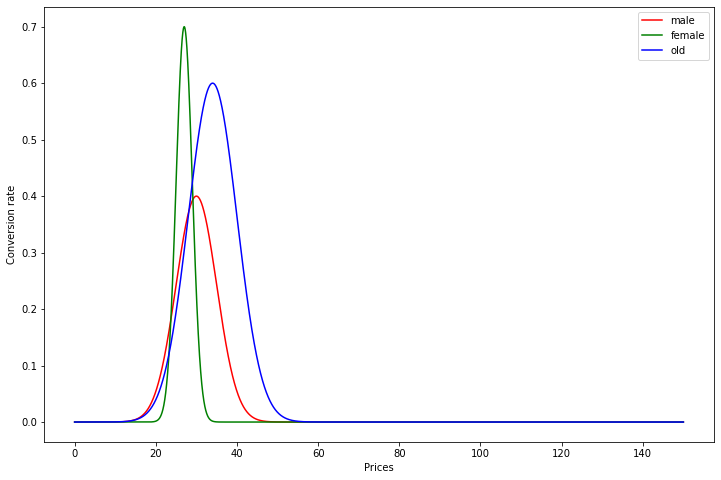

In [66]:
mu_52 = [30, 27 ,34]
sigma_52 = [5, 2, 6]
scale_52 = [0.4, 0.7, 0.6]
cv_52 = []
cv_52.append(cv_curve(mu_52[0], sigma_52[0], prices, scale_52[0]))
cv_52.append(cv_curve(mu_52[1], sigma_52[1], prices, scale_52[1]))
cv_52.append(cv_curve(mu_52[2], sigma_52[2], prices, scale_52[2]))
cv_52



plt.figure(figsize=(12,8))
plt.plot(prices, cv_52[0], color="red", label="male")
plt.plot(prices, cv_52[1], color="green", label="female")
plt.plot(prices, cv_52[2], color="blue", label="old")
plt.xlabel("Prices")
plt.ylabel("Conversion rate")
plt.legend()
plt.show()

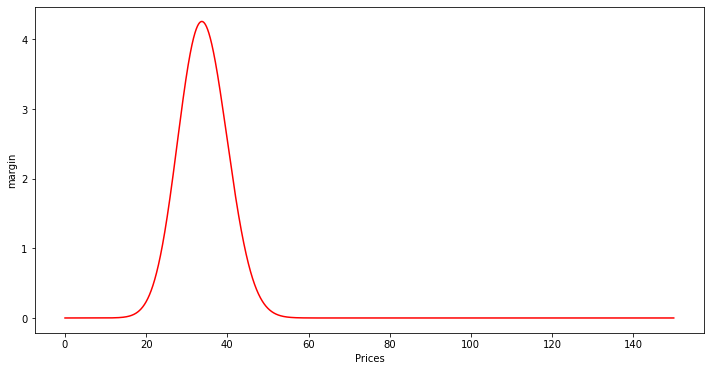

In [67]:
expected_margin_52 = 0
for i in range(classes):
    expected_margin_52 += cv_52[i] * customer_distribution[i] * alphas[4][i] * n_items[4][i]
expected_margin_52 = expected_margin_52 * prices


plt.figure(figsize=(12,6))

plt.plot(prices, expected_margin_52, color="red")
plt.xlabel("Prices")
plt.ylabel("margin")
plt.show()

In [68]:
selected_prices_52 = np.array([20, 25, 30, 45]) * cents
product1_margins_52 = [expected_margin_52[p] for p in selected_prices_52]
product1_margins_52

[0.23460596476985243, 1.386347880198275, 3.506890535061033, 0.8239661775318302]

In [69]:
c12_p5 = [cv_52[0][p] for p in selected_prices_52] 
c22_p5 = [cv_52[1][p] for p in selected_prices_52]
c32_p5 = [cv_52[2][p] for p in selected_prices_52]
print(c12_p5, c22_p5, c32_p5)

[0.05416299685566729, 0.24269315944646977, 0.4, 0.0044356063561737736] [0.0015348213758520051, 0.4249254669750122, 0.22691605334313067, 1.779540366333272e-18] [0.03945757455361998, 0.194872672245016, 0.48054923331539473, 0.11165986359035363]


In [70]:
approximation = 2
c12 = np.around([c12_p1, c12_p2, c12_p3, c12_p4, c12_p5], approximation)
c12 = c12.tolist()
c12

[[0.26, 0.26, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.04, 0.8, 0.0],
 [0.0, 0.3, 0.0, 0.0],
 [0.05, 0.24, 0.4, 0.0]]

In [71]:
c22 = np.around([c22_p1, c22_p2, c22_p3, c22_p4, c22_p5], approximation)
c22 = c22.tolist()

In [72]:
c32 = np.around([c32_p1, c32_p2, c32_p3, c32_p4, c32_p5], approximation)
c32 = c32.tolist()

## step 3

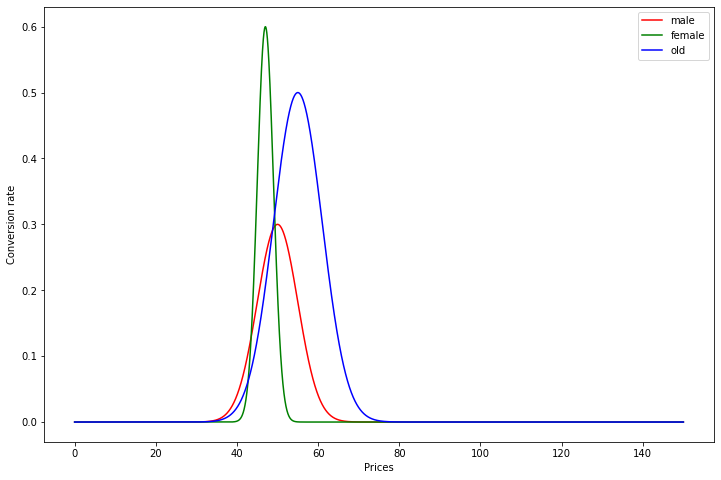

In [73]:
mu_53 = [50, 47 ,55]
sigma_53 = [5, 2, 6]
scale_53 = [0.3, 0.6, 0.5]
cv_53 = []
cv_53.append(cv_curve(mu_53[0], sigma_53[0], prices, scale_53[0]))
cv_53.append(cv_curve(mu_53[1], sigma_53[1], prices, scale_53[1]))
cv_53.append(cv_curve(mu_53[2], sigma_53[2], prices, scale_53[2]))
cv_53



plt.figure(figsize=(12,8))
plt.plot(prices, cv_53[0], color="red", label="male")
plt.plot(prices, cv_53[1], color="green", label="female")
plt.plot(prices, cv_53[2], color="blue", label="old")
plt.xlabel("Prices")
plt.ylabel("Conversion rate")
plt.legend()
plt.show()

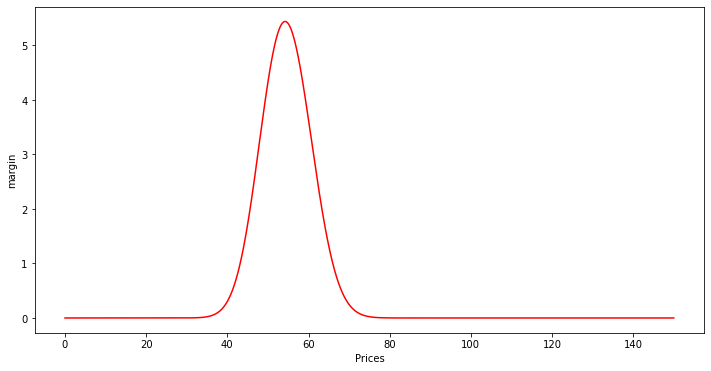

In [74]:
expected_margin_53 = 0
for i in range(classes):
    expected_margin_53 += cv_53[i] * customer_distribution[i] * alphas[4][i] * n_items[4][i]
expected_margin_53 = expected_margin_53 * prices


plt.figure(figsize=(12,6))

plt.plot(prices, expected_margin_53, color="red")
plt.xlabel("Prices")
plt.ylabel("margin")
plt.show()

In [75]:
selected_prices_53 = np.array([40, 45, 50, 60]) * cents
product1_margins_53 = [expected_margin_53[p] for p in selected_prices_53]
product1_margins_53

[0.30335058508052437,
 1.7178880492290758,
 4.328219895011941,
 3.6334838541344054]

In [76]:
c13_p5 = [cv_53[0][p] for p in selected_prices_53] 
c23_p5 = [cv_53[1][p] for p in selected_prices_53]
c33_p5 = [cv_53[2][p] for p in selected_prices_53]
print(c13_p5, c23_p5, c33_p5)

[0.04064392150942961, 0.18206842116332556, 0.3, 0.040535667687963746] [0.001318634816373244, 0.36446475674456075, 0.19430504612721414, 3.9630885833962795e-10] [0.021992893349107697, 0.12478005908083356, 0.35348777515775265, 0.3531278766405843]


In [77]:
approximation = 2
c13 = np.around([c13_p1, c13_p2, c13_p3, c13_p4, c13_p5], approximation)
c13 = c13.tolist()
c13

[[0.0, 0.0, 0.0, 0.0],
 [0.13, 0.4, 0.0, 0.0],
 [0.0, 0.0, 0.01, 0.53],
 [0.07, 0.44, 0.07, 0.0],
 [0.04, 0.18, 0.3, 0.04]]

In [78]:
c23 = np.around([c23_p1, c23_p2, c23_p3, c23_p4, c23_p5], approximation)
c23 = c23.tolist()

In [79]:
c33 = np.around([c33_p1, c33_p2, c33_p3, c33_p4, c33_p5], approximation)
c33 = c33.tolist()

# Build json

In [80]:

classes = []
classes.append(
    {
        "features": [0, 0],
        "alpha": [a[0] for a in alphas],
        "buy_distribution": [c1, c12, c13],
        "num_prods_distribution": [([1 / n[0]] * 4) for n in n_items],
        "click_graph": boy_graph
    }
)
classes.append(
    {
        "features": [0, 1],
        "alpha": [a[1] for a in alphas],
        "buy_distribution": [c2, c22, c23],
        "num_prods_distribution": [([1 / n[1]] * 4) for n in n_items],
        "click_graph": girl_graph
    }
)
classes.append(
    {
        "features": [1, 0],
        "alpha": [a[2] for a in alphas],
        "buy_distribution": [c3, c32, c33],
        "num_prods_distribution": [([1 / n[2]] * 4) for n in n_items],
        "click_graph": old_graph
    }
)
classes.append(
    {
        "features": [1, 1],
        "alpha": [a[2] for a in alphas],
        "buy_distribution": [c3, c32, c33],
        "num_prods_distribution": [([1 / n[2]] * 4) for n in n_items],
        "click_graph": old_graph
    }
)


# writing customers in file
file_path = os.path.abspath('') + "\\code\\data\\customer3_n_s.json"

with open(file_path, 'w') as outfile:
    json.dump({"classes": classes}, outfile)



In [81]:
classes

[{'features': [0, 0],
  'alpha': [0.2, 0.2, 0.2, 0.2, 0.2],
  'buy_distribution': [[[0.0, 0.04, 0.8, 0.04],
    [0.0, 0.49, 0.26, 0.0],
    [0.03, 0.6, 0.03, 0.0],
    [0.04, 0.8, 0.04, 0.0],
    [0.01, 0.36, 0.36, 0.01]],
   [[0.26, 0.26, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0],
    [0.0, 0.04, 0.8, 0.0],
    [0.0, 0.3, 0.0, 0.0],
    [0.05, 0.24, 0.4, 0.0]],
   [[0.0, 0.0, 0.0, 0.0],
    [0.13, 0.4, 0.0, 0.0],
    [0.0, 0.0, 0.01, 0.53],
    [0.07, 0.44, 0.07, 0.0],
    [0.04, 0.18, 0.3, 0.04]]],
  'num_prods_distribution': [[0.6666666666666666,
    0.6666666666666666,
    0.6666666666666666,
    0.6666666666666666],
   [0.8333333333333334,
    0.8333333333333334,
    0.8333333333333334,
    0.8333333333333334],
   [1.0, 1.0, 1.0, 1.0],
   [1.0, 1.0, 1.0, 1.0],
   [1.0, 1.0, 1.0, 1.0]],
  'click_graph': [[0, 0.3, 0.1, 0.2, 0.2],
   [0.5, 0, 0.2, 0.2, 0.1],
   [0.4, 0.2, 0, 0.3, 0.1],
   [0.6, 0.3, 0.1, 0, 0.1],
   [0.5, 0.1, 0.1, 0.1, 0]]},
 {'features': [0, 1],
  'alpha': [0.4, 0.5, 0.0